# AS5001 Advanced Data Analysis

## Python crib sheet

Andrew Cameron at St Andrews, September 2019

If you aren't a fluent python programmer yet, this little cribsheet shows you most of the "tricks of the trade" you'll be needing for homework and projects. 

### Preamble

Let's start with some essential imports for numerical computing and graphics.

In [1]:
# Enable inline plotting in notebook.
%matplotlib inline
# Populate namespace with numerical python function library and matplotlib plotting library.
import numpy as np
import matplotlib.pyplot as plt
# If you want to read CSV files you'd better import the necessary routines too.
import csv


### Plot sine and cosine curves and label axes. 

Google 'plt.plot' and 'matplotlib.pyplot' for more info.

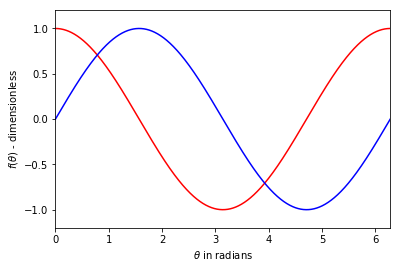

In [2]:
# Generate 1000 angles over the range 0 to 2*pi.
theta = np.linspace(0,2*np.pi,1000)
# Calculate their sines and cosines.
sthet = np.sin(theta)
cthet = np.cos(theta)
# Plot them.
plt.plot(theta,cthet,color='r')
plt.plot(theta,sthet,color='b')
# Set axis ranges.
plt.xlim(0,2*np.pi)
plt.ylim(-1.2,1.2)
# Label the axes.
plt.xlabel(r'$\theta$ in radians')
plt.ylabel(r'$f(\theta)$ - dimensionless')
# Optionally, save your plot to a PDF file
plt.savefig('curves.pdf')
# Show the plot and tidy up.
plt.show()
plt.close()

### Read some data from an excel .csv file and plot them with error bars

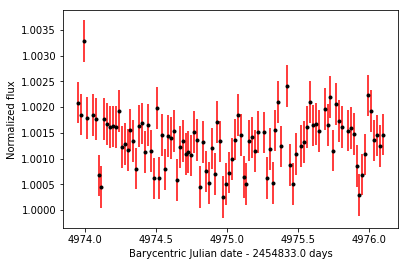

In [3]:
# Create empty array.
csvdata = []
filename = 'koi-2700.csv'
with open(filename) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    # Append the data, row by row.
    for row in readCSV:
        csvdata.append(row)
    
# Put the data into a numpy array
data = np.array(csvdata)
# Take columns out of data array and convert from strings to floating-point
date = data[:,0].astype(float)
flux = data[:,1].astype(float)
errs = data[:,2].astype(float)

# Plot a flat(tish) section of the data with errorbars.
flatdate,flatflux,flaterrs = date[450:550],flux[450:550],errs[450:550]
plt.plot(flatdate,flatflux,'.',color='k')
plt.errorbar(flatdate,flatflux,yerr=flaterrs,fmt="none",color='r')
plt.xlabel(r'Barycentric Julian date - 2454833.0 days')
plt.ylabel(r'Normalized flux')
plt.show()
plt.close()

### Plot a histogram of the data values.

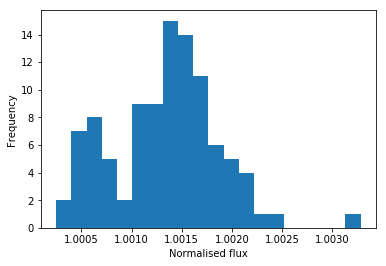

In [4]:
plt.hist(flatflux,bins=20)
plt.xlabel(r'Normalised flux')
plt.ylabel(r'Frequency')
plt.show()
plt.close()

In [5]:
### Compute the inverse-variance weighted mean of these data

 First do it the slow but reliable way with a loop. This is similar to the summation notation used in lectures.

In [6]:
nflat = len(flatdate)
sxw = 0.0
sw = 0.0
for i in range(nflat):
    wt = 1/flaterrs[i]/flaterrs[i]
    sxw = sxw + flatflux[i]*wt
    sw = sw + wt

meanflux = sxw/sw
print('Inverse variance-weighted mean flux = %7.5f' %meanflux )

Inverse variance-weighted mean flux = 1.00134


Next try it using python's array multiplication and summation capabilities to get rid of the loop. This uses python's vector processing capabilities so is faster when dealing with big datasets.

In [7]:
wt = 1/flaterrs/flaterrs
sxw = np.sum(flatflux*wt)
sw = np.sum(wt)
meanflux = sxw/sw
print('Inverse variance-weighted mean flux = %7.5f' %meanflux )


Inverse variance-weighted mean flux = 1.00134


Finally do it using vector/matrix methods. This is formally more correct but conceptually a bit harder and to be honest, the need to do the summation with a vector full of '1's in this particular case makes it look a bit clunky.

In [8]:
unit = np.ones_like(flatflux)
invar = 1/flaterrs/flaterrs
sxw = np.dot(np.dot(np.transpose(flatflux),np.diag(invar)),unit)
sw = np.dot(np.dot(np.transpose(unit),np.diag(invar)),unit)
meanflux = sxw/sw
print('Inverse variance-weighted mean flux = %7.5f' %meanflux )

Inverse variance-weighted mean flux = 1.00134


That's all for now!